## Paired Model-Dataset Test

This notebook is designed for fast testing with the provided fine-tuned model and its corresponding dataset.


---

For broader generalizable testing across multiple datasets, please refer to:

```general_test_model.ipynb``` 


---


In [1]:
from basicsr.demo_test import * 
from basicsr.model_train import restore
import matplotlib.pyplot as plt
import cv2
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
import tifffile
import numpy as np
import os 

### Our fine-tuned models for specific datasets

define paths 

In [2]:
sample = 'neurons'
model_pth = './experiments/demo_neurons/net_g_neurons.pth'
tiff_pth = './raw_data.tif'
data_pth = './test_dataset'

In [3]:
os.makedirs(data_pth,exist_ok=True)
generate_raw_data(raw_pth = tiff_pth, save_pth = data_pth, dr = 5)


uint16


In [4]:
output = restore(
    input_pth = os.path.join(data_pth, 'test_xz'),
    output_pth = f'../experiments/{sample}_xz',\
    model_pth =  model_pth)
output = restore(
    input_pth = os.path.join(data_pth, 'test_yz'),
    output_pth = f'../experiments/{sample}_yz',\
    model_pth =  model_pth)

Disable distributed.
none


/home/youlab/Desktop/workspace/jiashu/projects/SSAI-3D/basicsr/models/base_model.py:277: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_net = torch.load(
2024-10-26 11:4

 load net keys <built-in method keys of collections.OrderedDict object at 0x7b49f59ca0c0>


100%|██████████| 500/500 [00:29<00:00, 17.15it/s]

Disable distributed.


none


2024-10-26 11:48:32,564 INFO: Loading NAFNetLocal model from ./experiments/demo_neurons/net_g_neurons.pth.
2024-10-26 11:48:32,789 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x7b4a01994f40>


100%|██████████| 400/400 [00:29<00:00, 13.41it/s]


In [5]:
import tifffile
tmp = tifffile.imread('/home/youlab/Desktop/workspace/jiashu/projects/SSAI-3D/experiments/neurons_xz/0.tiff')
tmp.dtype

dtype('uint16')

In [6]:
in_pth_xz = os.path.join(data_pth, 'test_xz')
out_pth_xz = f'../experiments/{sample}_xz'
out_pth_yz = f'../experiments/{sample}_yz'
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

100%|██████████| 400/400 [00:00<00:00, 1297.75it/s]


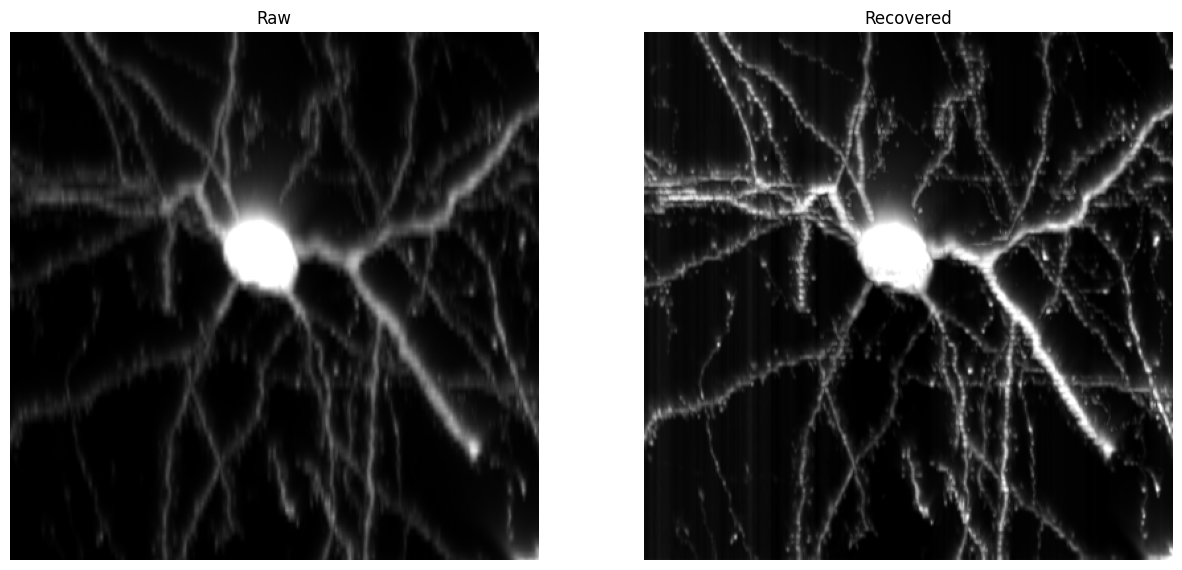

In [7]:

raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 100
depth = 300
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()


### Using Pre-trained model

In [8]:
output = restore(
    input_pth = os.path.join(data_pth, 'test_xz'),
    output_pth = f'../experiments/pretrained_{sample}_xz',\
    model_pth =  f'./experiments/pretrained_models/NAFNet-REDS-width64.pth')
output = restore(
    input_pth = os.path.join(data_pth, 'test_yz'),
    output_pth = f'../experiments/pretrained_{sample}_yz',\
    model_pth =  f'./experiments/pretrained_models/NAFNet-REDS-width64.pth')

Disable distributed.
none


2024-10-26 11:50:31,114 INFO: Loading NAFNetLocal model from ./experiments/pretrained_models/NAFNet-REDS-width64.pth.
2024-10-26 11:50:31,352 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x7b4a01a7cfc0>


100%|██████████| 500/500 [00:28<00:00, 17.25it/s]

Disable distributed.


none


2024-10-26 11:51:01,256 INFO: Loading NAFNetLocal model from ./experiments/pretrained_models/NAFNet-REDS-width64.pth.
2024-10-26 11:51:01,487 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x7b49f4fabac0>


100%|██████████| 400/400 [00:29<00:00, 13.35it/s]


In [9]:
data_pth
# os.path.join(data_pth,'text_xz', f'{idx}.tiff')
in_pth_xz = os.path.join(data_pth, 'test_xz')
out_pth_xz = f'../experiments/pretrained_{sample}_xz'
out_pth_yz = f'../experiments/pretrained_{sample}_yz'
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:00<00:00, 1235.84it/s]


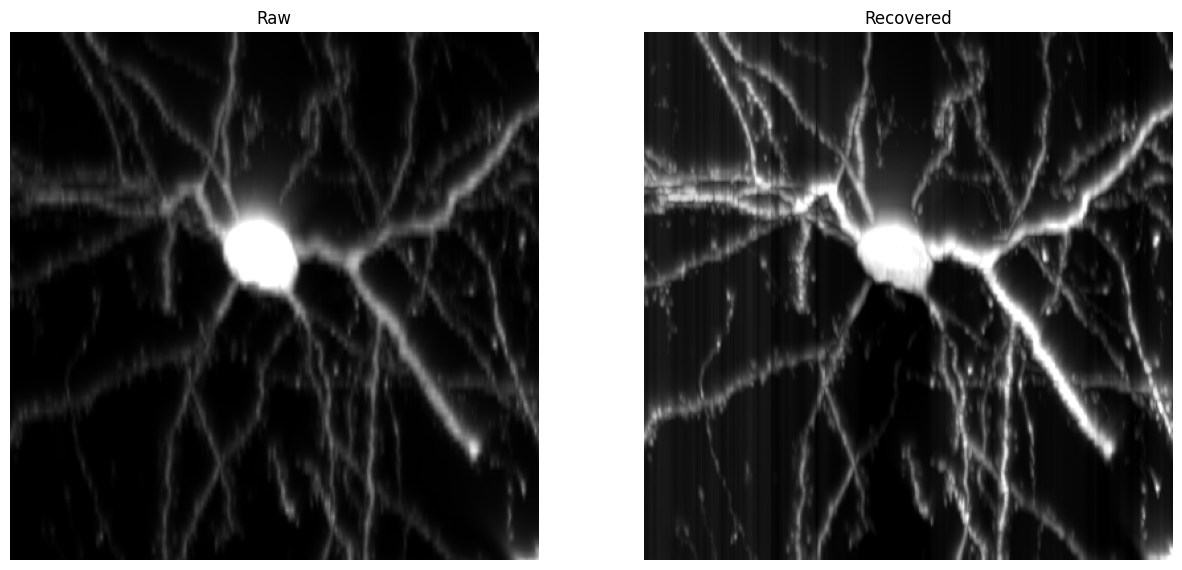

In [10]:

raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 100
depth = 300
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()
